# DOPPIA FENDITURA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'fenditura2.csv'
fr = pd.read_csv(FILE)

In [2]:
θ = (np.array(fr['angolo (°)']) - 90) * np.pi/180
sigmaθ = np.ones_like(θ) * np.pi/180
V = np.array(fr['V (mV)']) * 10**-3
sigmaV = np.array(fr['sigmaV (mV)']) * 10**-3

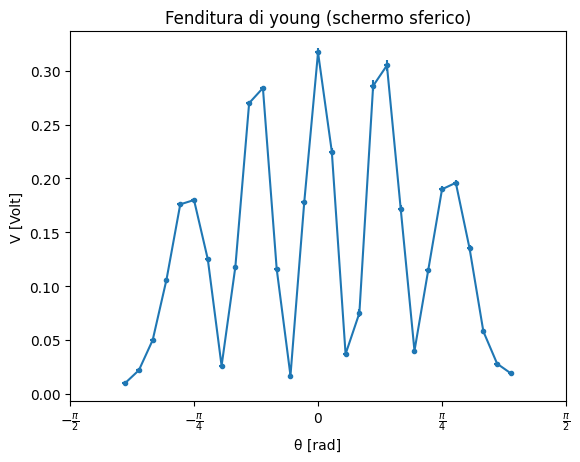

In [15]:
plt.errorbar(θ,V,yerr=sigmaV,xerr=sigmaθ,fmt='.-',label='data')
plt.ylabel('V [Volt]')
plt.xlabel('θ [rad]')
plt.title('Fenditura di young (schermo sferico)')
plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2],[r'$-\frac{\pi}{2}$',r'$-\frac{\pi}{4}$',r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$'])
plt.show()

In [5]:
# def interferenza(θ,R,d,k,A): # somma campi E1,E2
#     r1 = jnp.sqrt((R*jnp.sin(θ)-d/2)**2 + (R*jnp.cos(θ))**2)
#     r2 = jnp.sqrt((R*jnp.sin(θ)+d/2)**2 + (R*jnp.cos(θ))**2)
#     # print(r1,r2)
    
#     E1 = A*jnp.cos(k*r1)/r1
#     E2 = A*jnp.cos(k*r2)/r2
    
#     cos1phi = (R**2 + r1**2 - (d/2)**2) / (2*R*r1)
#     cos2phi = (R**2 + r2**2 - (d/2)**2) / (2*R*r2)
    
#     # print(E1,E2)
#     # return R*jnp.sin(k*θ)/θ
#     return E1 * cos1phi + E2 * cos2phi

# x = np.linspace(-np.pi/2,np.pi/2,1000)
# y = interferenza(x,1,0.05,2*np.pi/0.03,1)

# plt.plot(x,y)
    

In [6]:
FILE = dir_path + '/output.csv'
fr = pd.read_csv(FILE)
λ = np.float64(fr['λ'])


def campo_elettrico(R, d, theta, A):
    k = 2 * np.pi / λ  # Costante di propagazione
    r1 = np.sqrt((R * np.sin(theta) - d/2)**2 + (R * np.cos(theta))**2)
    r2 = np.sqrt((R * np.sin(theta) + d/2)**2 + (R * np.cos(theta))**2)
    
    E1 = A * np.cos(k * r1) / r1
    E2 = A * np.cos(k * r2) / r2
    
    cos1phi = (R**2 + r1**2 - (d/2)**2) / (2 * R * r1)
    cos2phi = (R**2 + r2**2 - (d/2)**2) / (2 * R * r2)
    
    campo = E1 * cos1phi + E2 * cos2phi
    return np.abs(campo)